In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('../data/heart-disease.csv')

In [45]:
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [47]:
data['sex'] = data['sex'].astype('category')
data['cp'] = data['cp'].astype('category')
data['fbs'] = data['fbs'].astype('category')
data['restecg'] = data['restecg'].astype('category')
data['exang'] = data['exang'].astype('category')
data['slope'] = data['slope'].astype('category')
data['ca'] = data['ca'].astype('category')
data['thal'] = data['thal'].astype('category')
data['target'] = data['target'].astype('category')

In [48]:
data['age'] = data['age'].astype('int8')
data['trestbps'] = data['trestbps'].astype('int16')
data['chol'] = data['chol'].astype('int16')
data['thalach'] = data['thalach'].astype('int16')

In [49]:
data['oldpeak'] = data['oldpeak'].astype('float16')

In [50]:
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.040039
std,9.082101,17.538143,51.830751,22.905161,1.161133
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.799805
75%,61.000000,140.000000,274.500000,166.000000,1.599609
max,77.000000,200.000000,564.000000,202.000000,6.199219


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int8    
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int16   
 4   chol      303 non-null    int16   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int16   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float16 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float16(1), int16(3), int8(1)
memory usage: 6.8 KB


In [52]:
cat_features = data.select_dtypes(include=['category']).columns.to_list()
num_features = data.select_dtypes(include=['number']).columns.to_list()

In [53]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {data[cat].nunique()}')

sex - numer of unique = 2
cp - numer of unique = 4
fbs - numer of unique = 2
restecg - numer of unique = 3
exang - numer of unique = 2
slope - numer of unique = 3
ca - numer of unique = 5
thal - numer of unique = 4
target - numer of unique = 2


In [54]:
for col in cat_features:
    print(f'Unique categories in {col}: {data[col].value_counts()}')

Unique categories in sex: sex
1    207
0     96
Name: count, dtype: int64
Unique categories in cp: cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
Unique categories in fbs: fbs
0    258
1     45
Name: count, dtype: int64
Unique categories in restecg: restecg
1    152
0    147
2      4
Name: count, dtype: int64
Unique categories in exang: exang
0    204
1     99
Name: count, dtype: int64
Unique categories in slope: slope
2    142
1    140
0     21
Name: count, dtype: int64
Unique categories in ca: ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
Unique categories in thal: thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64
Unique categories in target: target
1    165
0    138
Name: count, dtype: int64


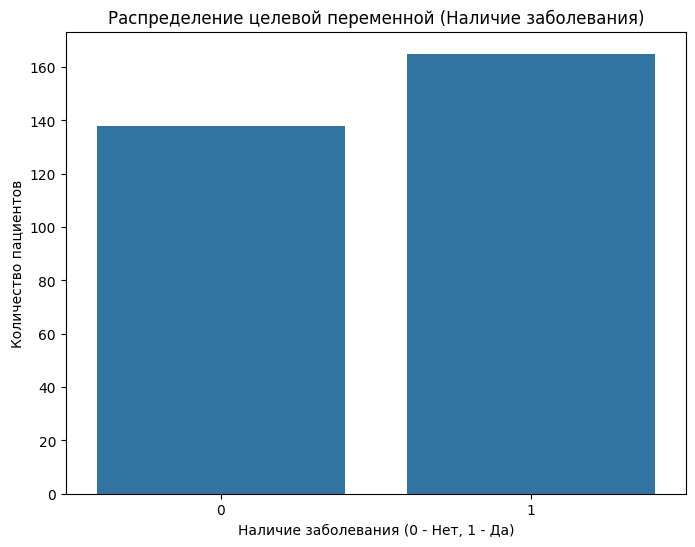

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Распределение целевой переменной (Наличие заболевания)')
plt.xlabel('Наличие заболевания (0 - Нет, 1 - Да)')
plt.ylabel('Количество пациентов')
plt.savefig('../eda/graph1.png')
plt.show()

**Из графика распределения целевой переменной (наличия заболевания) видно, что кол-во наблюдений в каждой группе примерно одинаково, что не повлияет на качество обучения модели в будущем**

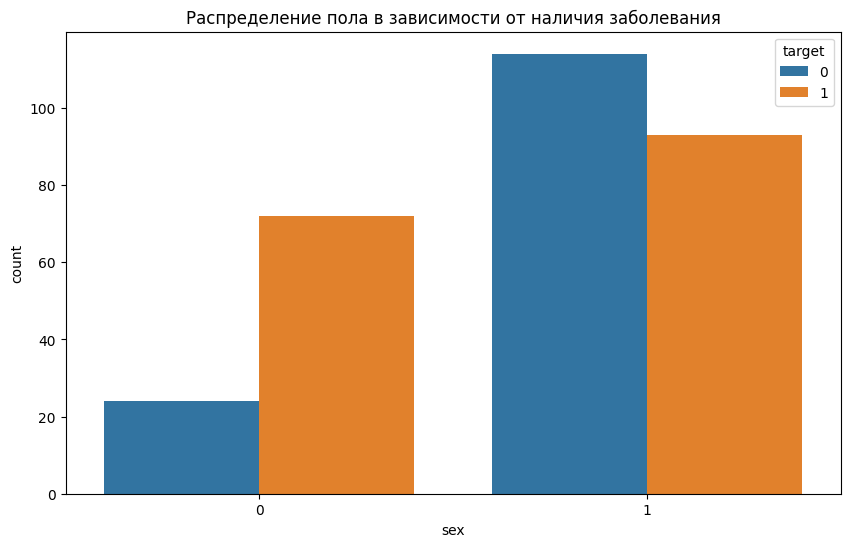

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Распределение пола в зависимости от наличия заболевания')
plt.savefig('../eda/graph2.png')
plt.show()

**Из графика Распределение пола в зависимости от наличия заболевания видно, что заболевания у мужчин встречаются чаще чем у женщин**

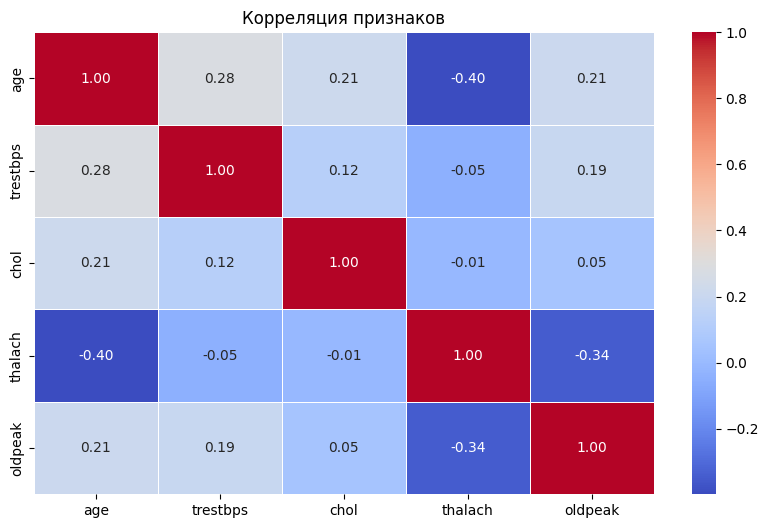

In [21]:
# Отбираем только нужные числовые признаки
numeric_df = data[num_features]

# Рассчитываем корреляционную матрицу
corr_matrix = numeric_df.corr()

# Увеличим размер графика
plt.figure(figsize=(10, 6))

# Построим тепловую карту корреляций с помощью seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Добавим заголовок
plt.title('Корреляция признаков')
plt.savefig('../eda/graph3.png')

# Отображаем график
plt.show()

**Из графика корреляций признаков наблдается обратная зависимоть между возрастом и максимальным кол-вом сердченых скоращений, примерно такая же зависимоть наблюдается между частотой сердечных скоращний и ST-маркером.**

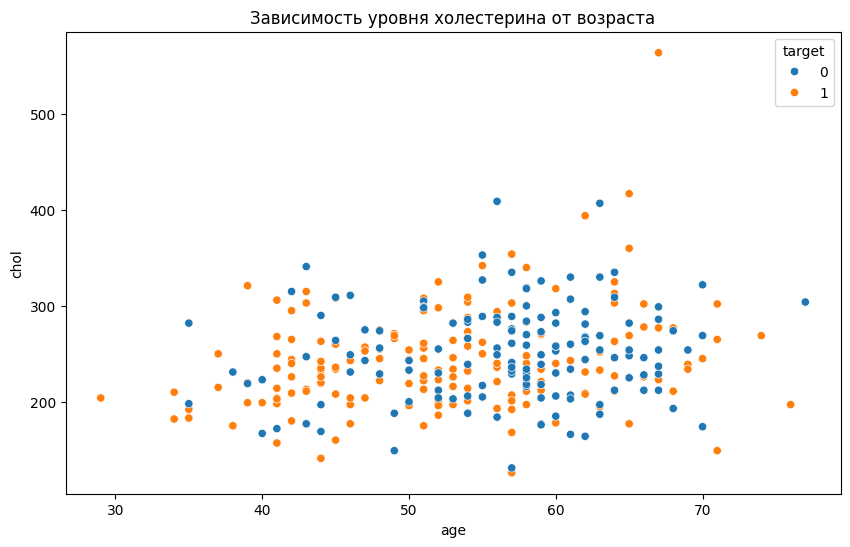

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=data)
plt.title('Зависимость уровня холестерина от возраста')
plt.savefig('../eda/graph4.png')
plt.show()

**По данному графику можно сказать, что уровень холестерина достаточно неинформативный признак для определения целевой переменной и линейная зависимость ненаблюдается.**

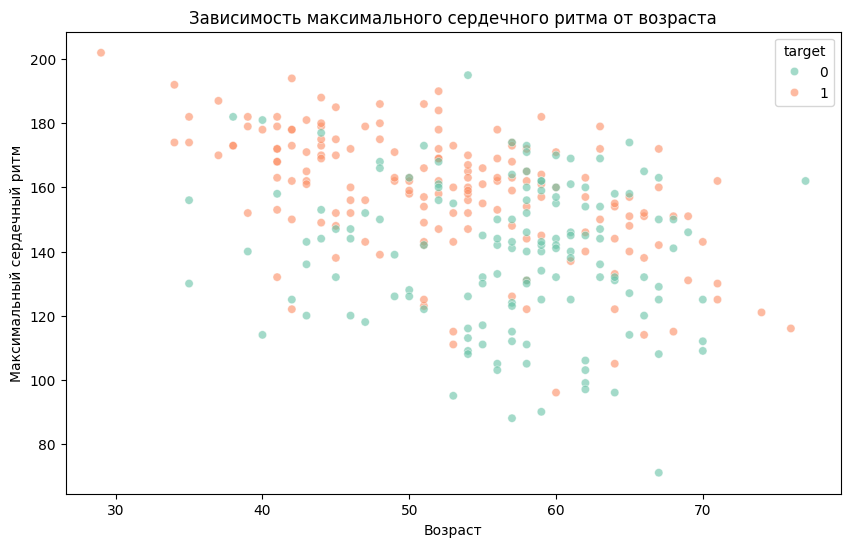

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=data, palette='Set2', alpha=0.6)
plt.title('Зависимость максимального сердечного ритма от возраста')
plt.xlabel('Возраст')
plt.ylabel('Максимальный сердечный ритм')
plt.savefig('../eda/graph5.png')
plt.show()

**В данном графике достаточно хорошо прослеживается обратная заисимость между возрастом и максимальным середчным ритмом, при этом можно отметить, что наблюдения с более высоким сердречным ритмом чаще пожвержены заболеваниям.**

/tmp/ipykernel_3496/595577427.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease_count = data.groupby(['age_group', 'target']).size().unstack(fill_value=0)


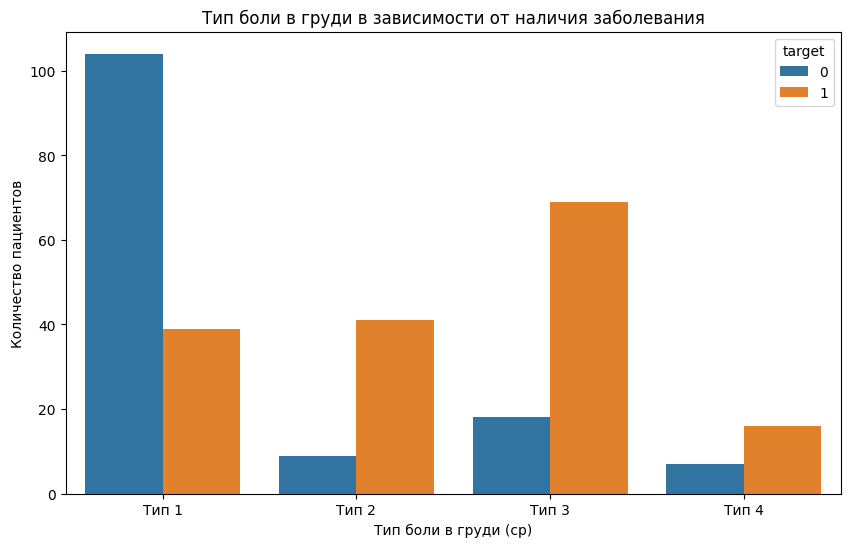

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data)# Создаем возрастные группы
bins = [29, 39, 49, 59, 69, 79] # Определите границы возрастных групп
labels = ['30-39', '40-49', '50-59', '60-69', '70-79'] # Метки для групп
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Подсчитываем количество заболеваний в каждой возрастной группе
age_disease_count = data.groupby(['age_group', 'target']).size().unstack(fill_value=0)

# Настройки графика
plt.title('Тип боли в груди в зависимости от наличия заболевания')
plt.xlabel('Тип боли в груди (cp)')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Тип 1', 'Тип 2', 'Тип 3', 'Тип 4'])
plt.savefig('../eda/graph6.png')
plt.show()

**Из данного графика видно, что типы болей 2, 3 и 4 намного чаще соответствуют наличию заболевания, в отличие от типа болей 1.**

In [25]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [26]:
import plotly.express as px
import kaleido
# Построение интерактивной гистограммы для возраста
fig = px.histogram(data, x='age', color='target',
title='Интерактивная гистограмма распределения возраста',
labels={'target': 'Наличие заболевания'},
barmode='overlay')
fig.write_image('../eda/graph7.png')
# Отображение графика
fig.show()

**Из графика видно, что группа людей возрастом от 34 до 55 лет наиболее подвержена заболеваниям**

In [55]:
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.040039
std,9.082101,17.538143,51.830751,22.905161,1.161133
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.799805
75%,61.000000,140.000000,274.500000,166.000000,1.599609
max,77.000000,200.000000,564.000000,202.000000,6.199219


In [ ]:
data = data.drop(['chol'], axis = 1)

In [60]:
data.to_pickle('../data/final_dataset.pkl')